PH3022 - Machine Learning and Neural Computation - Assignment 02 

Q1

a

Regularized linear regression helps prevent overfitting in a model. 

It adds a penalty to large coefficient values so that the model doesn't fit the noise in the data. 

This makes the model more accurate and stable when predicting new, unseen data. 

It also helps when some input features are highly correlated or when there are many features compared to the number of samples.

b

<table border="1" style="border-collapse: collapse; width: 100%; text-align: center;">
  <tr>
    <th>Feature</th>
    <th>Lasso Regression (L1)</th>
    <th>Ridge Regression (L2)</th>
    <th>Elastic Net Regression (L1 + L2)</th>
  </tr>
  <tr>
    <td><b>Penalty Term</b></td>
    <td>λ Σ|βᵢ|</td>
    <td>λ Σβᵢ²</td>
    <td>λ [ α Σ|βᵢ| + (1−α) Σβᵢ² ]</td>
  </tr>
  <tr>
    <td><b>Effect on Coefficients</b></td>
    <td>Can make some coefficients exactly 0 (feature selection)</td>
    <td>Shrinks coefficients but none become 0</td>
    <td>Can shrink and remove features depending on α</td>
  </tr>
  <tr>
    <td><b>Use Case</b></td>
    <td>When few features are important</td>
    <td>When all features are useful</td>
    <td>When features are correlated</td>
  </tr>
  <tr>
    <td><b>Bias-Variance Tradeoff</b></td>
    <td>High bias, low variance</td>
    <td>Moderate bias, low variance</td>
    <td>Balanced bias and variance</td>
  </tr>
  <tr>
    <td><b>Interpretability</b></td>
    <td>Produces sparse, simple models</td>
    <td>Produces dense models</td>
    <td>Intermediate sparsity controlled by α (l1_ratio)</td>
  </tr>
</table>

c & f

In [31]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = [0.01, 0.02, 0.05, 0.1, 0.11, 0.5, 0.9, 1, 2]
results = []

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Alpha': alpha, 'MSE': mse})

results_df = pd.DataFrame(results)
print("\nRidge Regression MSE for Different Alpha Values:")
display(results_df)

optimum = results_df.loc[results_df['MSE'].idxmin()]
print(f"\nOptimum Alpha: {optimum['Alpha']}")
print(f"Minimum MSE: {optimum['MSE']:.4f}")


Ridge Regression MSE for Different Alpha Values:


,Alpha,MSE
0,0.01,24.291746
1,0.02,24.292466
2,0.05,24.295132
3,0.10,24.301026
4,0.11,24.302389
5,0.50,24.377610
6,0.90,24.458884
7,1.00,24.477191
8,2.00,24.610934



Optimum Alpha: 0.01
Minimum MSE: 24.2917


d & f

In [32]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = [0.01, 0.02, 0.05, 0.1, 0.11, 0.5, 0.9, 1, 2]
results = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'Alpha': alpha, 'MSE': mse})

results_df = pd.DataFrame(results)
print("\nLasso Regression MSE for Different Alpha Values:")
display(results_df)

optimum = results_df.loc[results_df['MSE'].idxmin()]
print(f"\nOptimum Alpha: {optimum['Alpha']}")
print(f"Minimum MSE: {optimum['MSE']:.4f}")


Lasso Regression MSE for Different Alpha Values:


,Alpha,MSE
0,0.01,24.610934
1,0.02,24.610934
2,0.05,24.610934
3,0.10,24.610934
4,0.11,24.610934
5,0.50,24.610934
6,0.90,24.610934
7,1.00,24.610934
8,2.00,24.610934



Optimum Alpha: 0.01
Minimum MSE: 24.6109


e & f

In [35]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha_values = [0.01, 0.02, 0.05, 0.1, 0.11, 0.5, 0.9, 1, 2]
l1_ratios = [0.01, 0.1, 0.5, 0.7, 1]
results = []

for alpha in alpha_values:
    for l1 in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results.append({'Alpha': alpha, 'l1_ratio': l1, 'MSE': mse})

results_df = pd.DataFrame(results)
print("\nElasticNet Regression MSE for Different Alpha and l1_ratio Values:")
display(results_df)

optimum = results_df.loc[results_df['MSE'].idxmin()]
print(f"\nOptimum Alpha: {optimum['Alpha']}")
print(f"Optimum l1_ratio: {optimum['l1_ratio']}")
print(f"Minimum MSE: {optimum['MSE']:.4f}")


ElasticNet Regression MSE for Different Alpha and l1_ratio Values:


,Alpha,l1_ratio,MSE
0,0.01,0.01,24.711472
1,0.01,0.10,24.707017
2,0.01,0.50,24.643854
3,0.01,0.70,24.562706
4,0.01,1.00,24.303336
5,0.02,0.01,24.691565
6,0.02,0.10,24.708428
7,0.02,0.50,24.755933
8,0.02,0.70,24.734482
9,0.02,1.00,24.394433



Optimum Alpha: 0.5
Optimum l1_ratio: 0.01
Minimum MSE: 23.4017


g

Optimum Values Detected:
 Ridge - alpha = 0.100
 Lasso - alpha = 0.010
 ElasticNet - alpha = 0.050, l1_ratio = 0.500


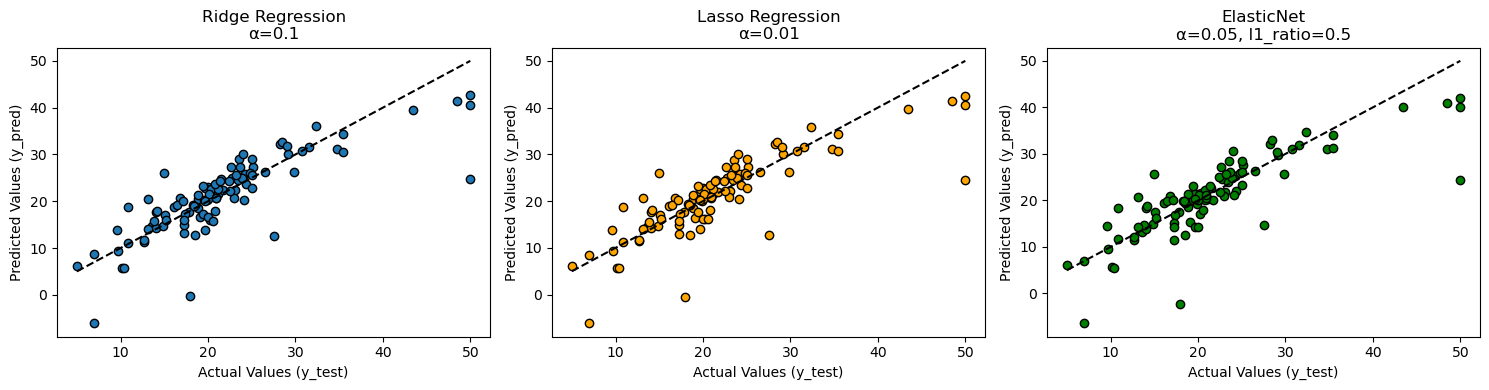

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

opt_alpha_ridge = 0.1  
opt_alpha_lasso = 0.01  
opt_alpha_elastic = 0.05  
opt_l1_ratio_elastic = 0.5  

print("Optimum Values Detected:")
print(f" Ridge - alpha = {opt_alpha_ridge:.3f}")
print(f" Lasso - alpha = {opt_alpha_lasso:.3f}")
print(f" ElasticNet - alpha = {opt_alpha_elastic:.3f}, l1_ratio = {opt_l1_ratio_elastic:.3f}")

ridge_best = Ridge(alpha=opt_alpha_ridge)
ridge_best.fit(X_train, y_train)
y_pred_ridge = ridge_best.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

lasso_best = Lasso(alpha=opt_alpha_lasso, max_iter=10000)
lasso_best.fit(X_train, y_train)
y_pred_lasso = lasso_best.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

elastic_best = ElasticNet(alpha=opt_alpha_elastic, l1_ratio=opt_l1_ratio_elastic, max_iter=10000)
elastic_best.fit(X_train, y_train)
y_pred_elastic = elastic_best.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

plt.figure(figsize=(15, 4))

# Ridge Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title(f'Ridge Regression\nα={opt_alpha_ridge}')

# Lasso Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title(f'Lasso Regression\nα={opt_alpha_lasso}')

# ElasticNet Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_elastic, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title(f'ElasticNet\nα={opt_alpha_elastic}, l1_ratio={opt_l1_ratio_elastic}')

plt.tight_layout()
plt.show()

Q2

a

Cross-validation is a model evaluation technique where the dataset is split into several smaller subsets (called “folds”).

The model is trained on some folds and tested on the remaining fold.

This process repeats until every fold has been used once as a test set.

The final performance is the average across all folds.

b

Reduces overfitting risk - the model is tested on multiple unseen subsets, ensuring generalization.

Uses data efficiently - all data points are used for both training and testing.

More reliable accuracy estimate - gives a stable measurement compared to a single train/test split.

Helps in hyperparameter tuning - allows selecting the best model settings using validation folds.

c

In k-fold cross-validation:

    1)The dataset is divided into k equal-sized folds.
    
    2)The model is trained on k-1 folds and tested on the remaining 1 fold.
    
    3)This is repeated k times, each time using a different fold as the test set.
    
    4)The final score is the average of all k test results.

Example: If k = 3, the dataset is divided into 3 parts, and the model is trained/tested 3 times.

d

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
df = pd.read_csv(url)
X = df.drop(columns=['medv'])
y = df['medv']

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
model = LinearRegression()

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
mse_scores = -scores

print("Linear Regression 3-Fold MSE:", mse_scores)
print("Mean MSE:", mse_scores.mean())

Linear Regression 3-Fold MSE: [20.59500679 27.31734136 21.66891755]
Mean MSE: 23.19375523272933


Comment:

The Linear Regression model shows moderate error and performs consistently across folds.
Since the MSE values do not vary drastically between the three folds, the model shows low variance and good generalization.

e

In [5]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=20000) 
scores = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=kfold)
mse_scores = -scores

print("Lasso Regression 3-Fold MSE:", mse_scores)
print("Mean MSE:", mse_scores.mean())

Lasso Regression 3-Fold MSE: [20.68734024 27.39871655 21.74278238]
Mean MSE: 23.27627972157302


Comment:

Lasso Regression performs similarly to Linear Regression, but with slightly higher error.
This is expected because Lasso adds L1 penalty, shrinking some coefficients, which can slightly increase bias.
Overall, Lasso still generalizes reasonably well and reduces overfitting compared to plain Linear Regression.